In [2]:
%pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
# reading the data
df = pd.read_csv('/content/sdss_100k_galaxy_form_burst.csv', header=1)
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [5]:
# checking shape of dataset
df.shape

(100000, 43)

In [6]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [7]:
# checking for null values
df.isnull().sum()

,0
objid,0
specobjid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
modelFlux_u,0


In [8]:
# ordinal encoding - replace subclass with a 0/1 for classification
df['subclass'].replace(['STARFORMING', 'STARBURST'], [0, 1], inplace=True)

#**Exploratory Data Analysis**

**Descriptive Statistical**

In [9]:
# statistical information about dataset
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


**Univariate Analysis**

In [10]:
# check class counts
sub = df["subclass"].value_counts()
sub

,count
subclass,
0,74993
1,25007


array([<Axes: ylabel='count'>], dtype=object)

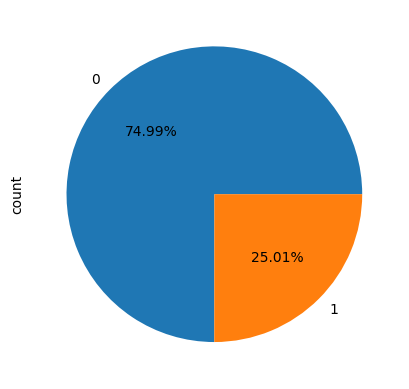

In [11]:
# visualize class distribution
sub.plot(kind="pie", subplots=True, autopct="%1.2f%%")

In [13]:
def func(col):
  sns.boxplot(x=col, data=df)
  plt.show()

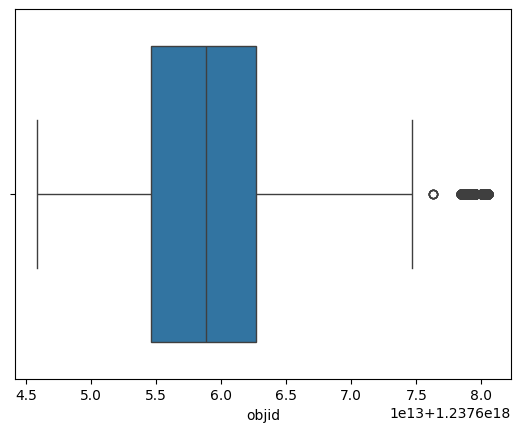

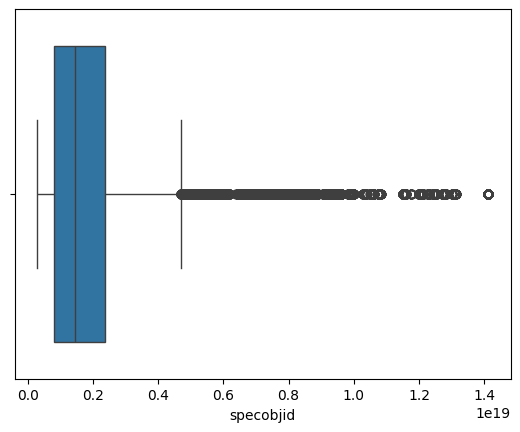

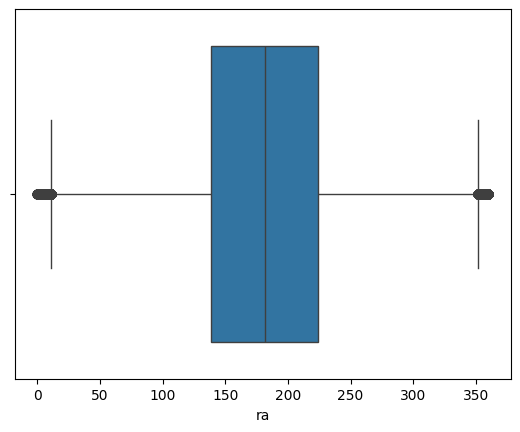

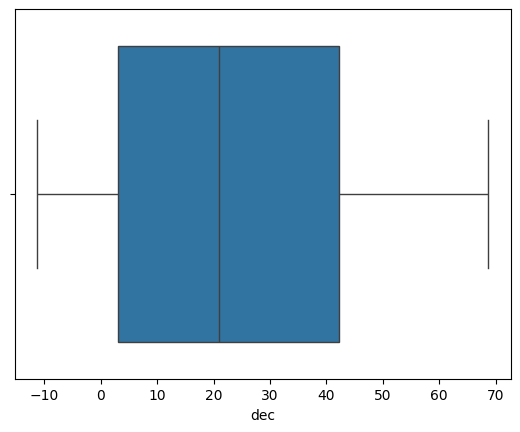

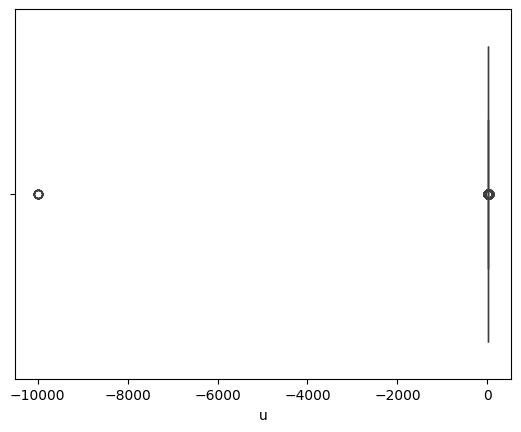

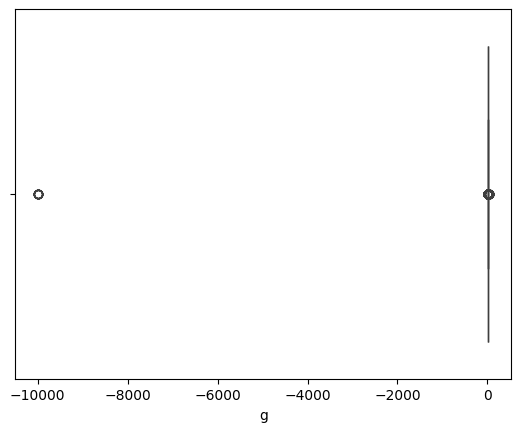

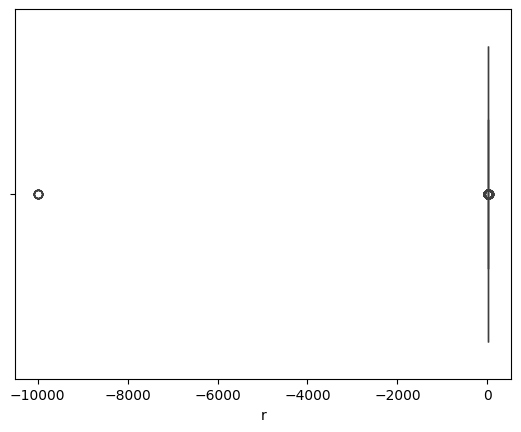

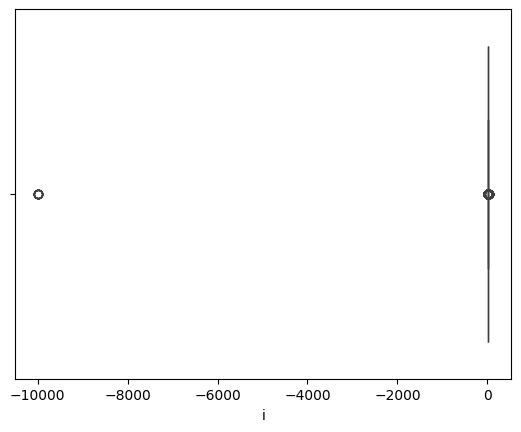

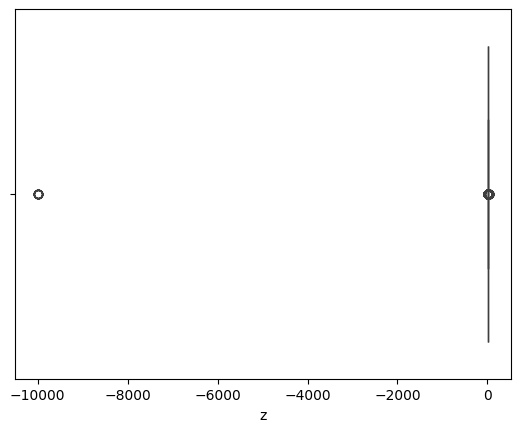

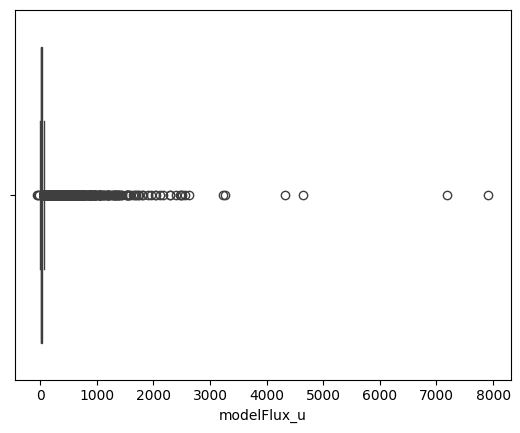

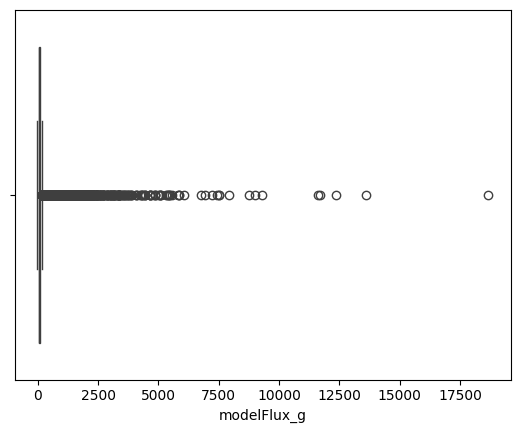

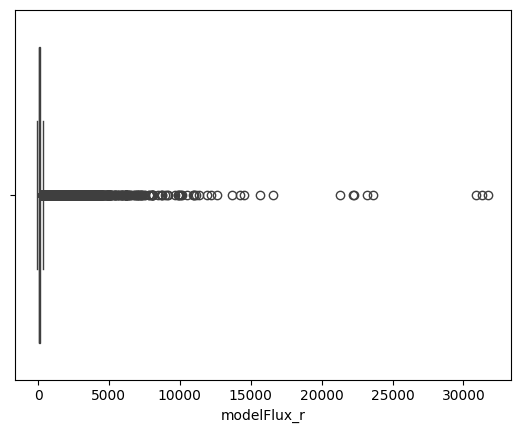

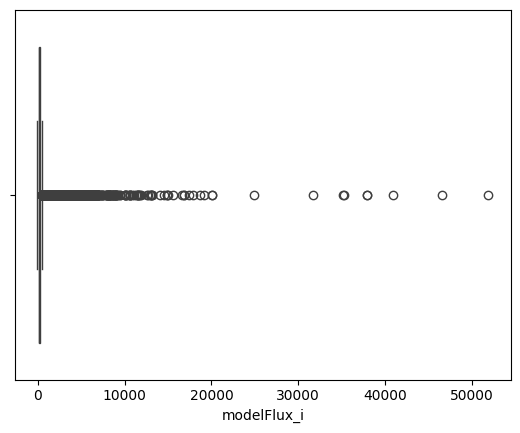

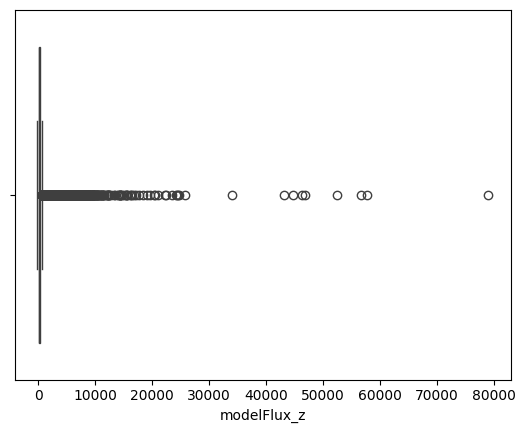

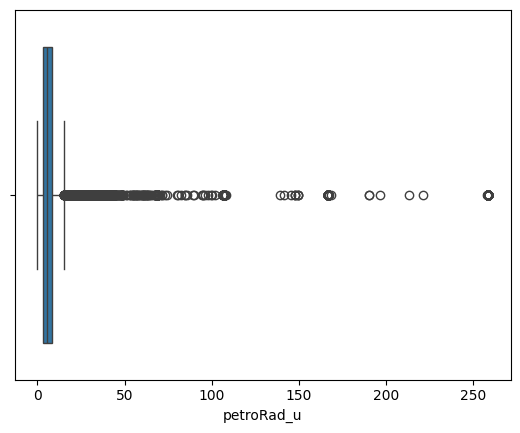

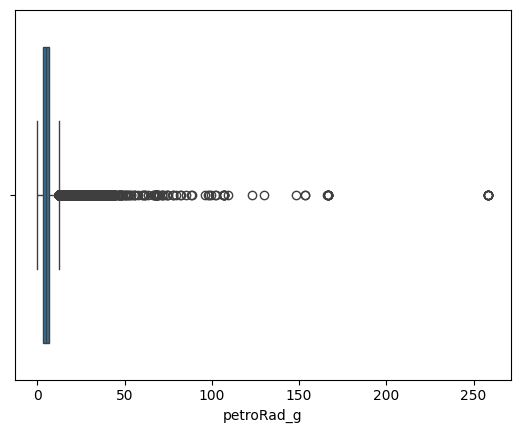

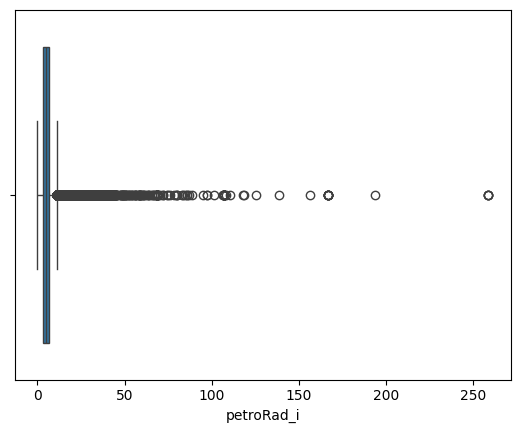

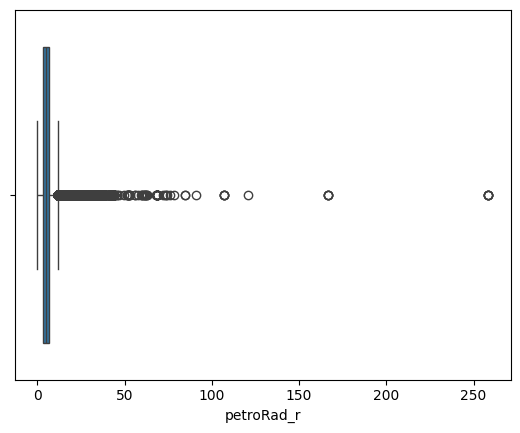

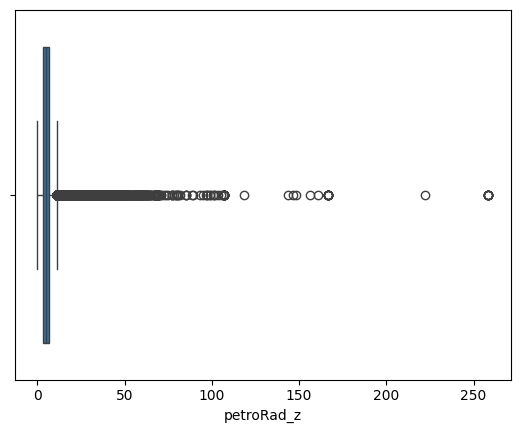

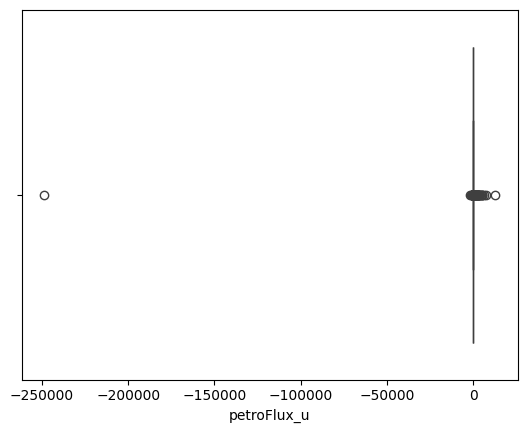

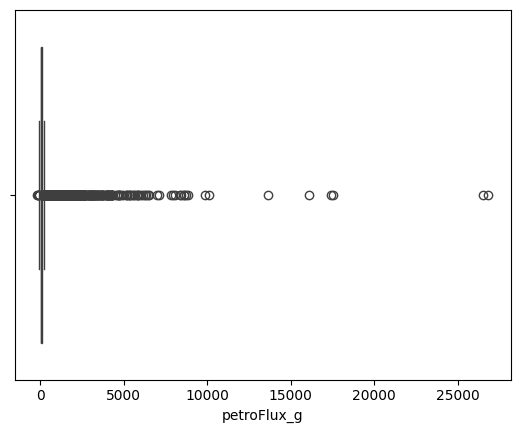

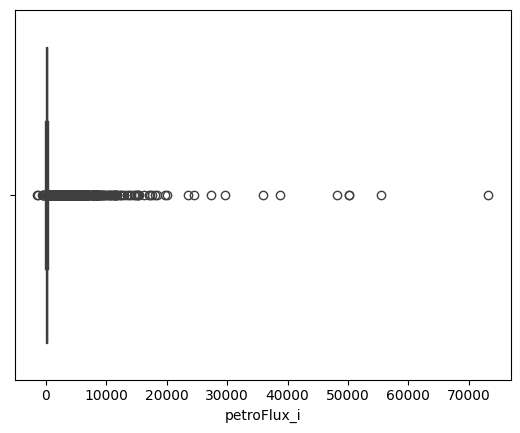

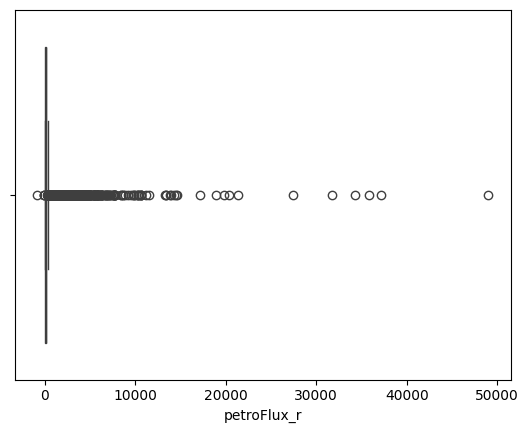

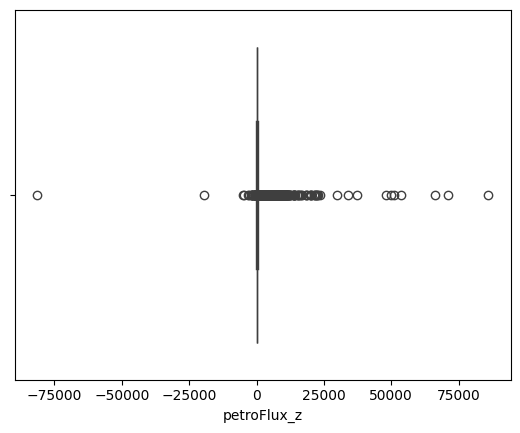

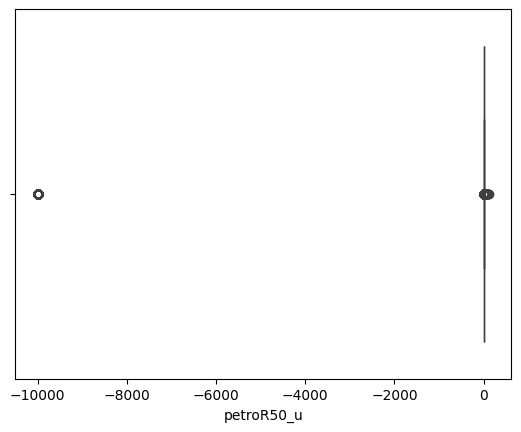

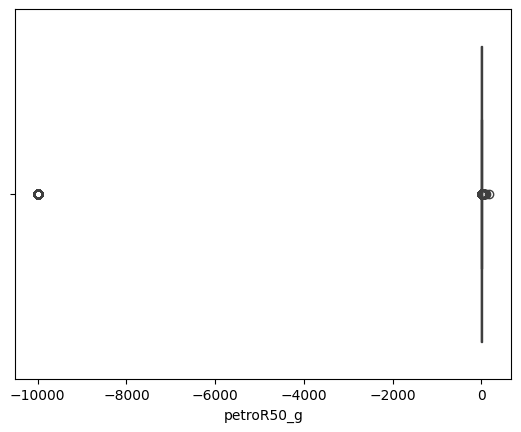

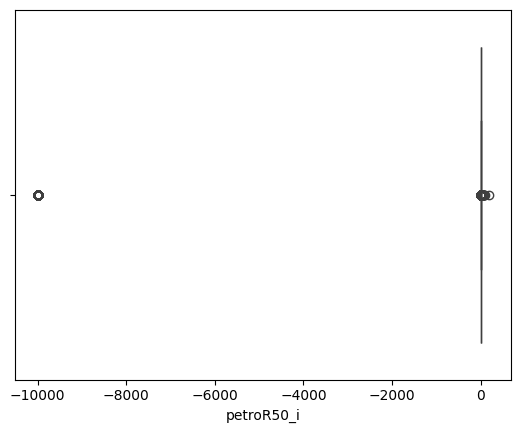

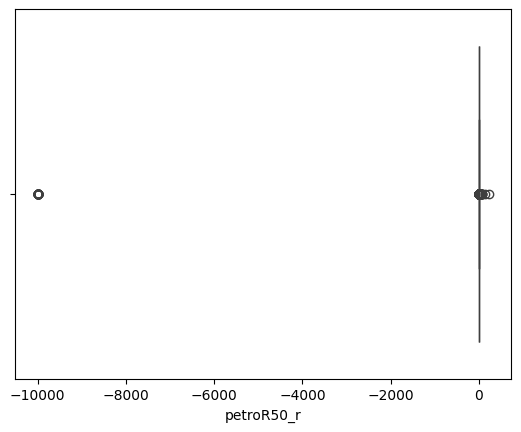

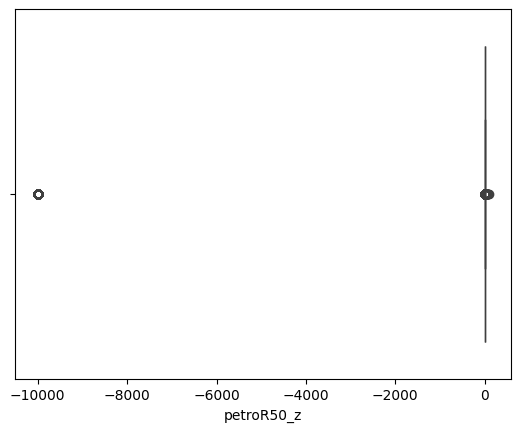

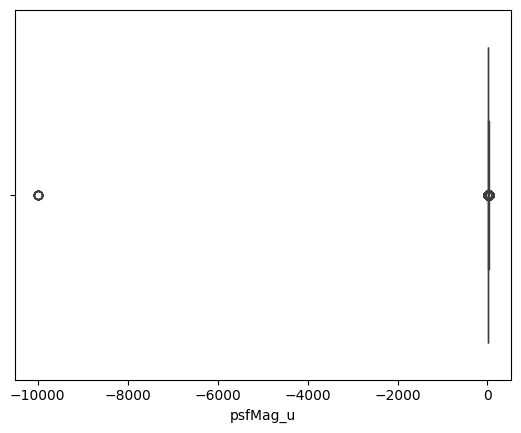

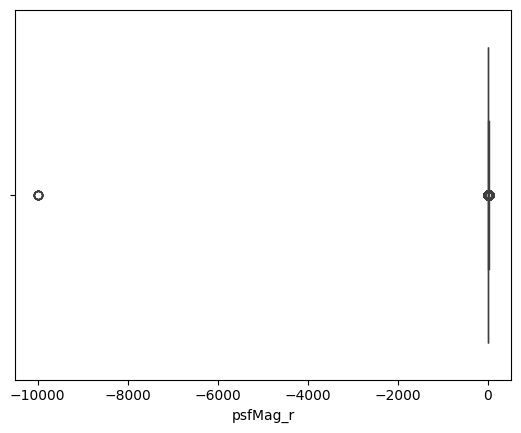

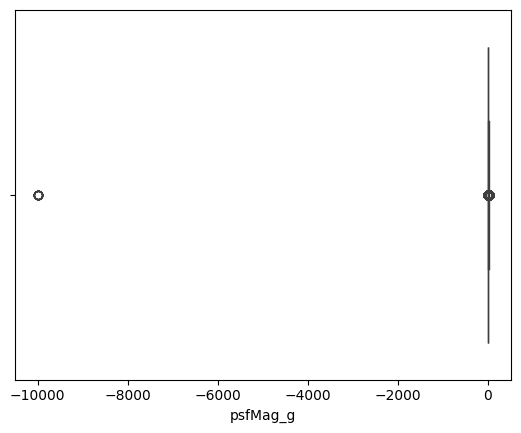

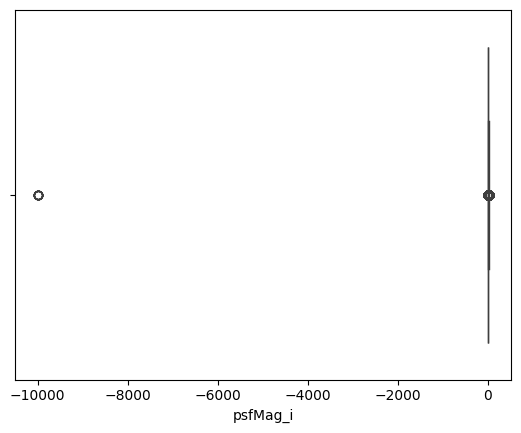

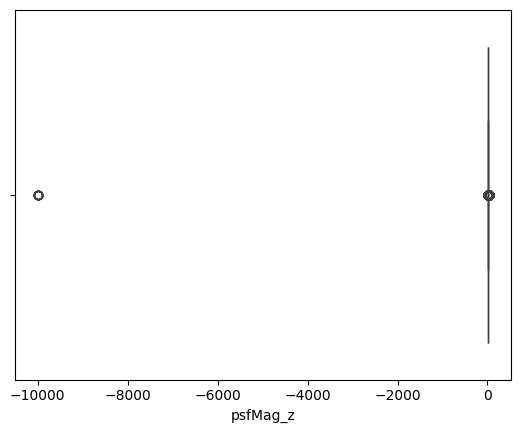

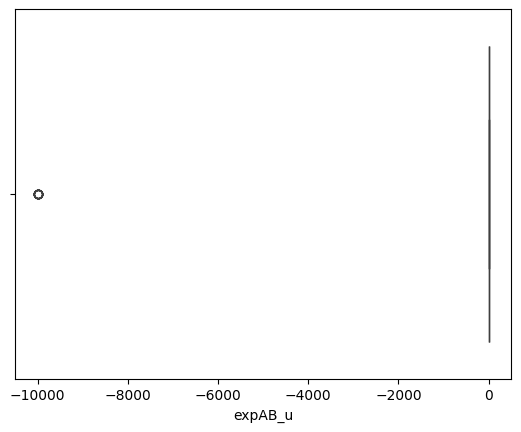

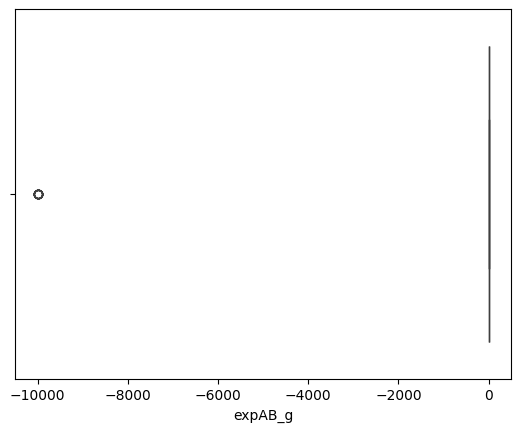

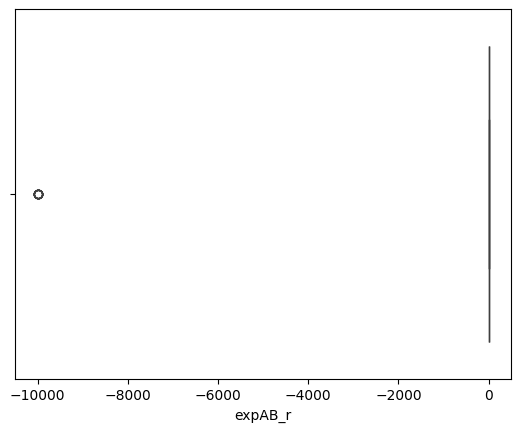

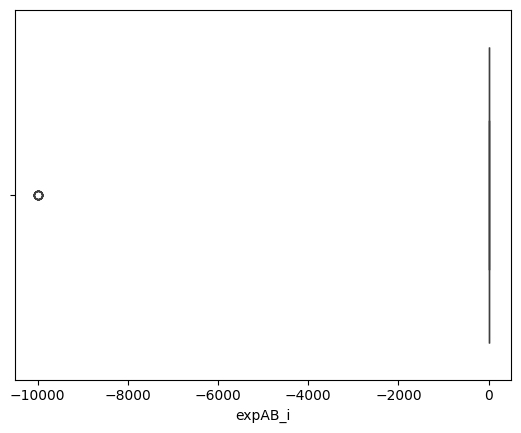

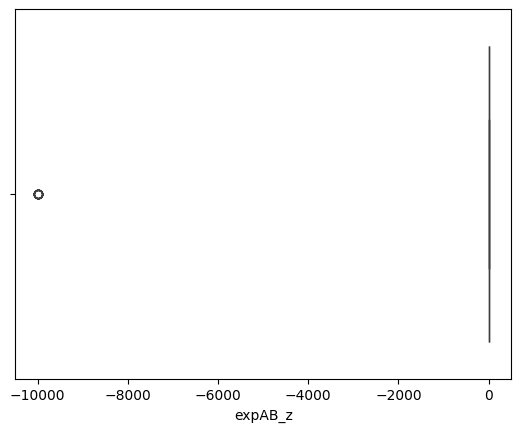

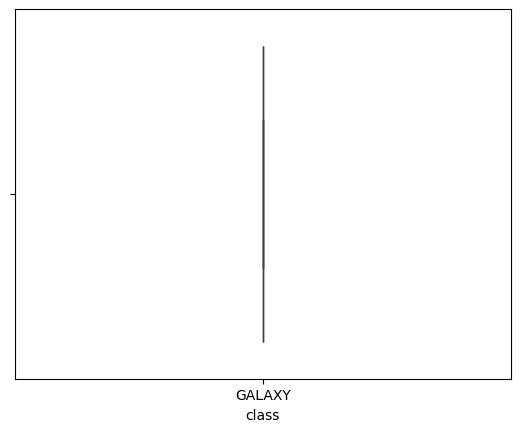

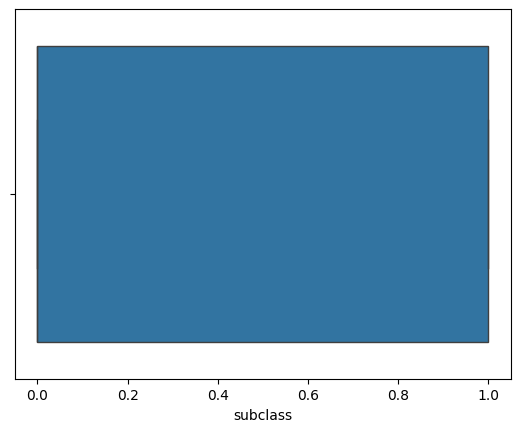

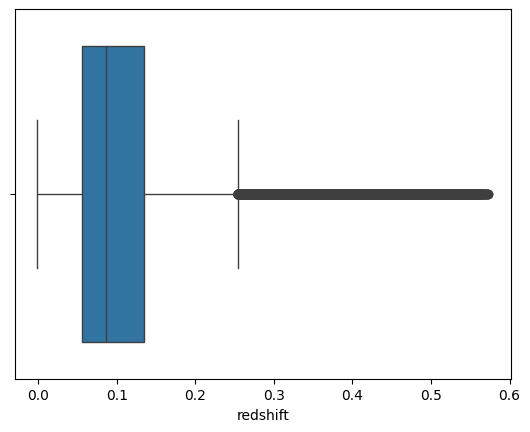

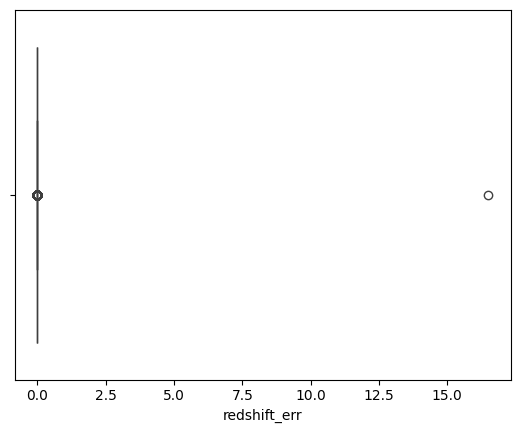

In [14]:
for i in df.columns:
  func(i)

**Bivariate Analysis**

<Axes: xlabel='subclass', ylabel='i'>

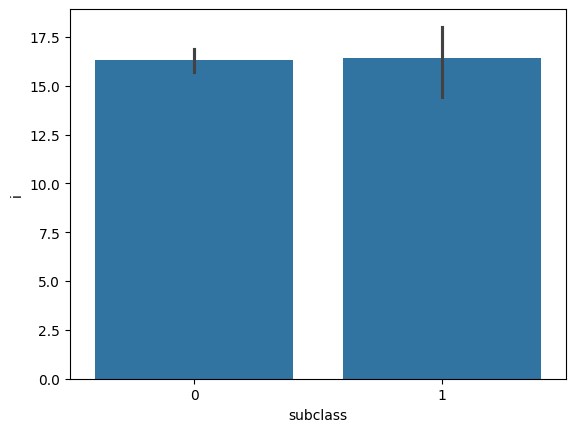

In [15]:
# Barplot comparison for feature 'i' across subclasses
sns.barplot(x='subclass', y='i', data=df)

<Axes: xlabel='subclass', ylabel='z'>

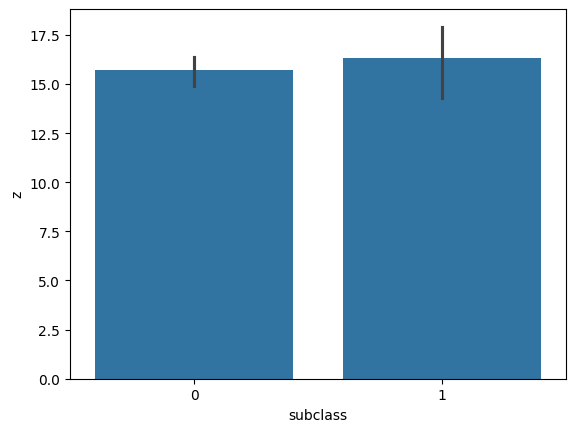

In [16]:
sns.barplot(x='subclass', y='z', data=df)

**Multivariate Analysis**

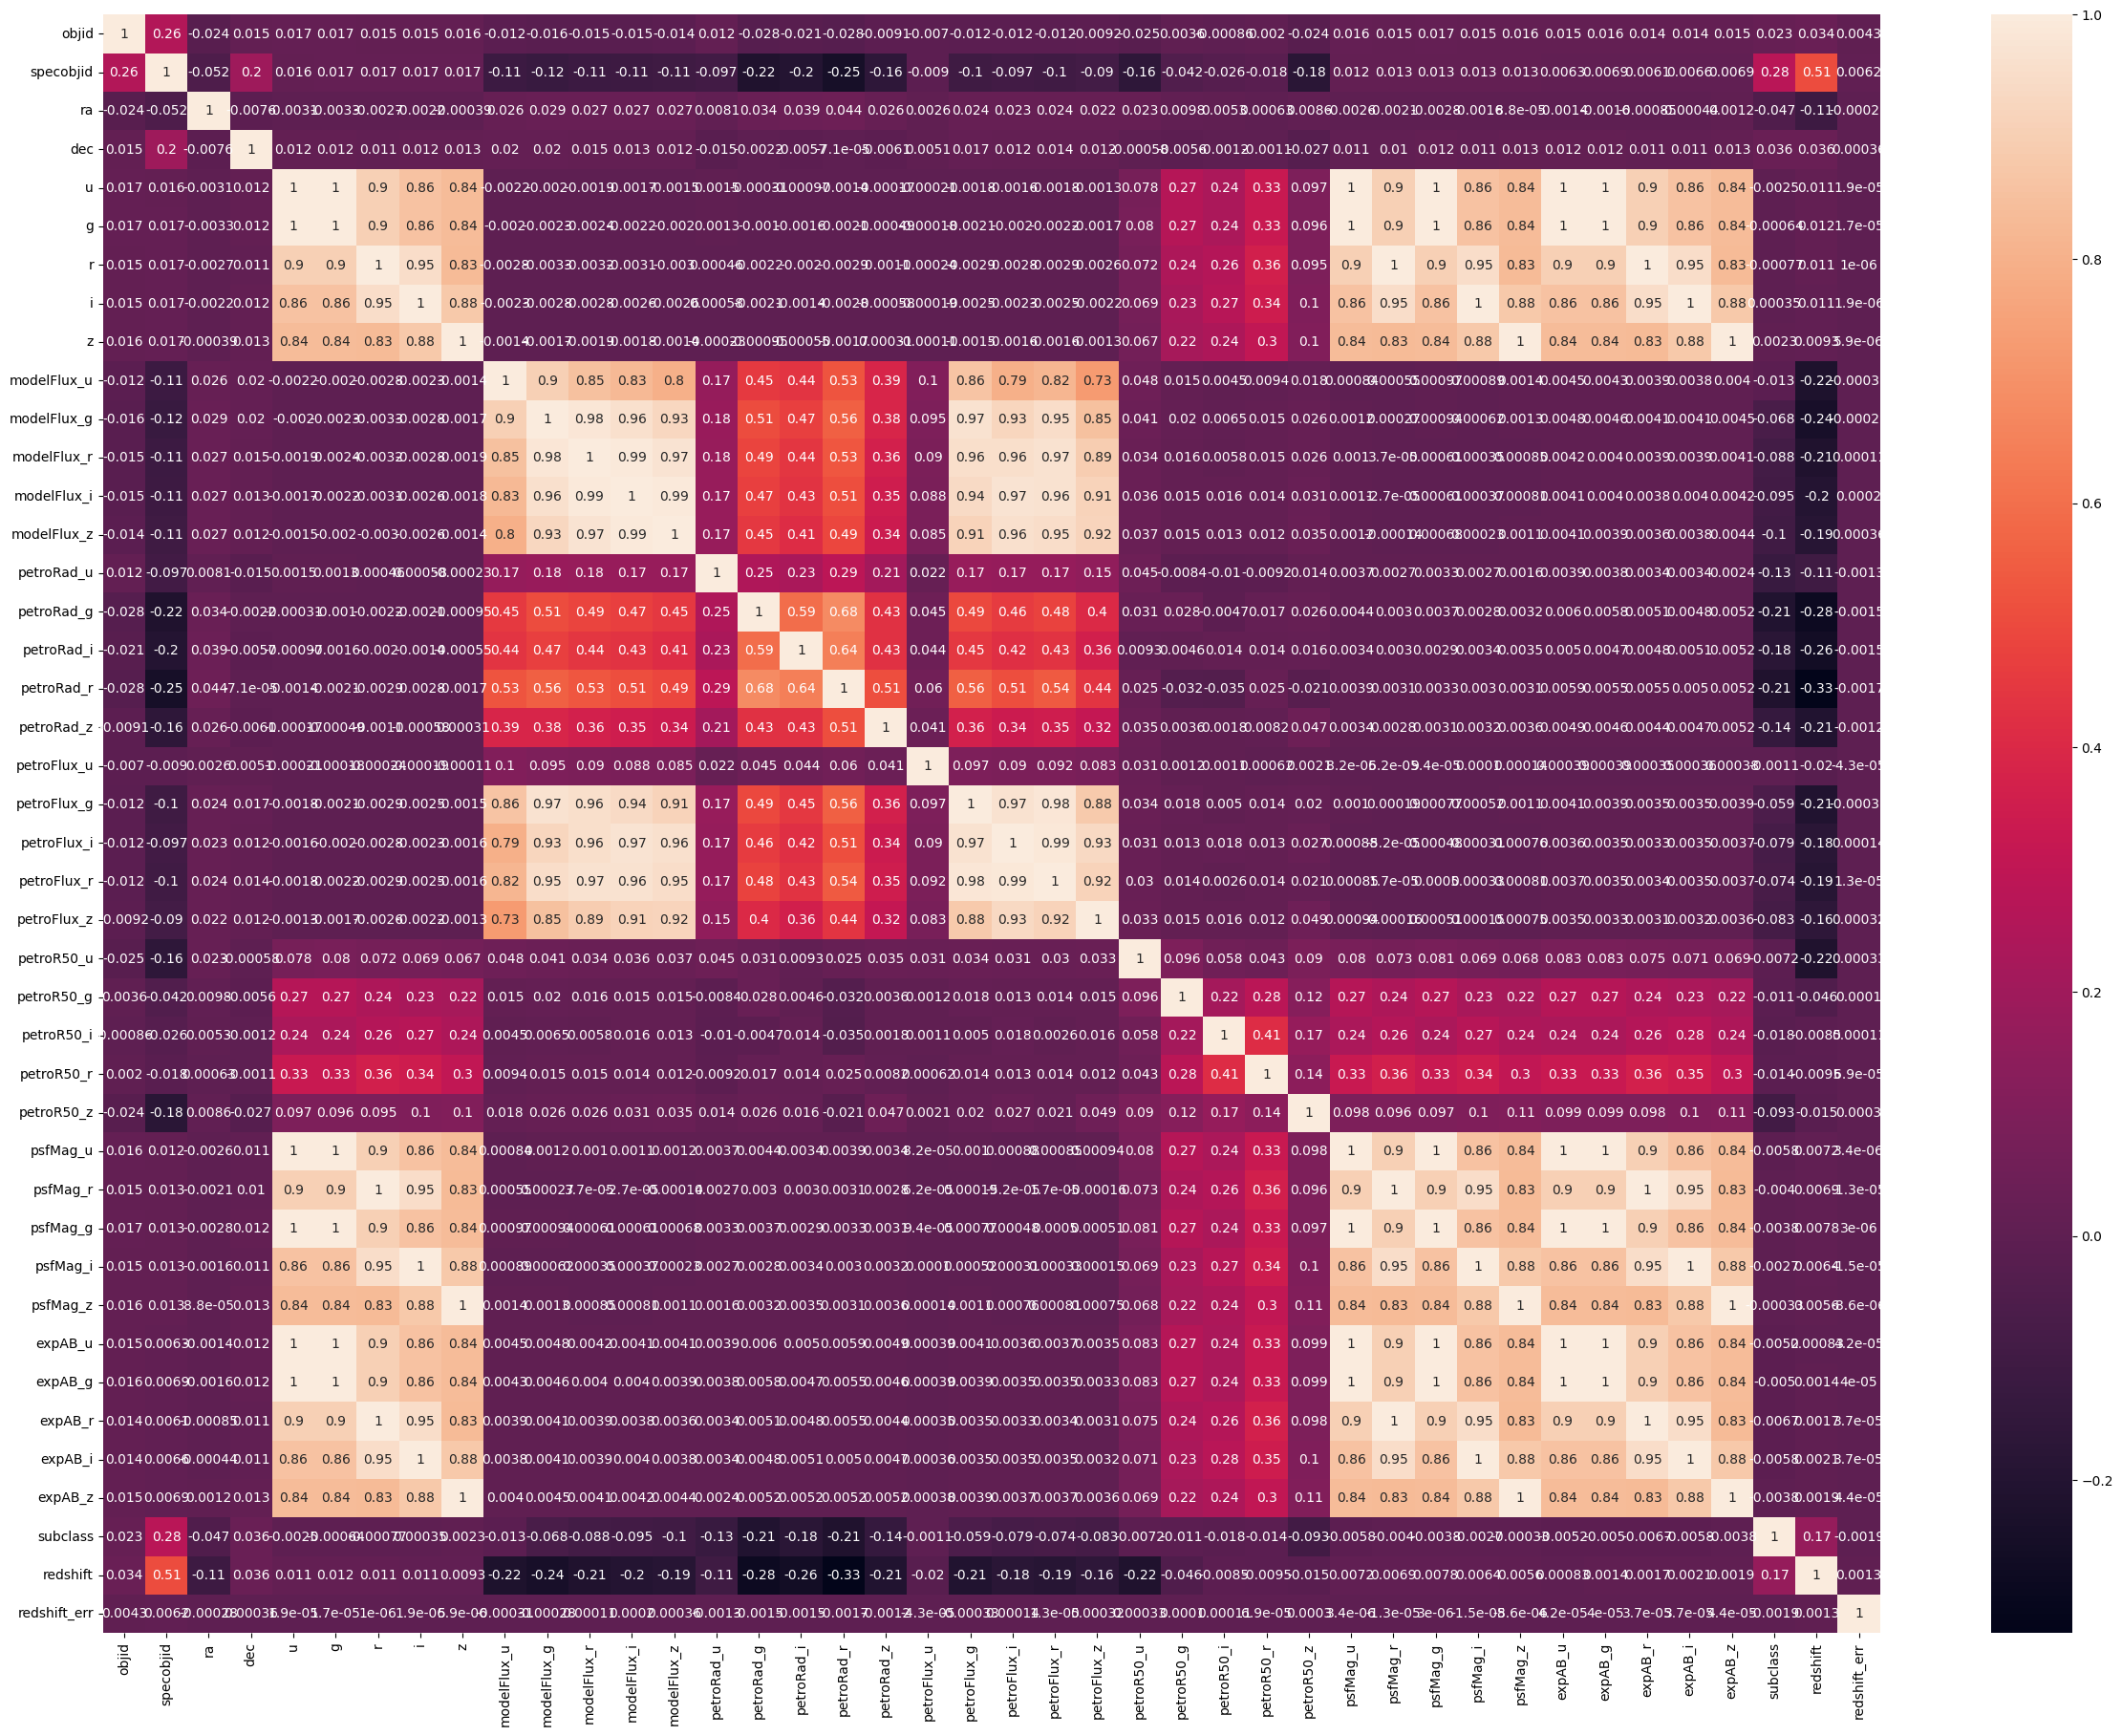

In [18]:
# Feature correlation heatmap
plt.figure(figsize=(30, 22))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

**Handling the Outliers**

In [19]:
quant = df['u'].quantile(q=[0.75, 0.25])
print(quant)

Q3 = quant.loc[0.75]
print(Q3)

Q1 = quant.loc[0.25]
print(Q1)

IQR = Q3 - Q1
print(IQR)

maxwhisker = Q3 + 1.5 * IQR
print(maxwhisker)

minwhisker = Q1 - 1.5 * IQR
print(minwhisker)

0.75    20.079470
0.25    18.762215
Name: u, dtype: float64
20.07947
18.762214999999998
1.317255000000003
22.055352500000005
16.786332499999993


<Axes: ylabel='u'>

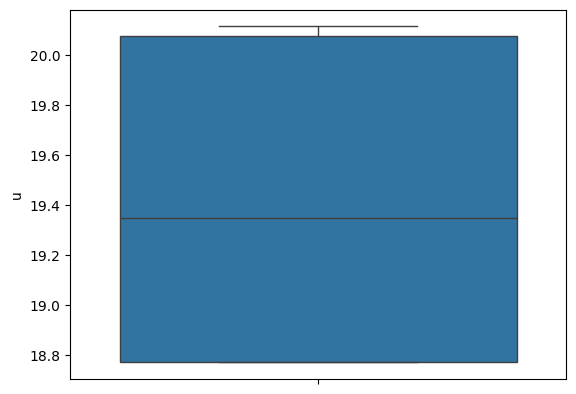

In [20]:
df['u'] = np.where(df['u'] > 20.116540, 20.116540, df['u'])
df['u'] = np.where(df['u'] < 18.772018, 18.772018, df['u'])

sns.boxplot(y='u', data=df)

**Selecting Best Features using Select K Best**

In [23]:
x = df.drop(['subclass', 'class'], axis=1)
y = df['subclass']

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming X and y are your data and target variables
selector = SelectKBest(score_func=f_classif, k=10) # Select top 10 features

# Fit selector to the data
X_selected = selector.fit_transform(x, y)

# Get the names of the selected features
selected_features = x.columns[selector.get_support()]

# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['specobjid', 'u', 'modelFlux_i', 'modelFlux_z', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'redshift'],
      dtype='object')


**Balancing Value Counts using Smote**

In [26]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the new value counts
print(pd.Series(y_resampled).value_counts())

subclass
0    74993
1    74993
Name: count, dtype: int64


**Splitting Data into Train and Test**

In [27]:
# Selecting the specific top 10 columns + subclass
df1=df[['i','z','modelFlux_z','petroRad_g','petroRad_r','petroFlux_z','petroR50_u','petroR50_g','petroR50_i','petroR50_r','subclass']]

In [28]:
from sklearn.model_selection import train_test_split

x = df1[['i', 'z', 'modelFlux_z', 'petroRad_g', 'petroRad_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r']]
y = df1["subclass"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

**Scaling The Feature Variables using Standardscaler Method**

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply scaling to the training set
sc = StandardScaler()
scaled_data = sc.fit_transform(x_train)

# **Model Building**

**Decision Tree Classifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the classifier
clf = DecisionTreeClassifier()

In [31]:
# Initialize the classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print the overall accuracy score
print(accuracy_score(y_pred, y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85     15045
           1       0.55      0.57      0.56      4955

    accuracy                           0.78     20000
   macro avg       0.70      0.71      0.71     20000
weighted avg       0.78      0.78      0.78     20000

0.77925


**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score

# Initialize and fit the model
lg = LogisticRegression()
log = lg.fit(x_train, y_train)

# Make predictions
y_pred = lg.predict(x_test)

# Print evaluation metrics
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("------------------------------------------")
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[14946    99]
 [ 4756   199]]
------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86     15045
           1       0.67      0.04      0.08      4955

    accuracy                           0.76     20000
   macro avg       0.71      0.52      0.47     20000
weighted avg       0.74      0.76      0.67     20000



In [33]:
# Print overall accuracy
print(accuracy_score(y_pred, y_test))

0.75725


**Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Random Forest classifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
# Make predictions
RFtrain = RF.predict(x_train)
RFtest = RF.predict(x_test)
# Print classification report and confusion matrix
print(confusion_matrix(RFtrain, y_train))
print(confusion_matrix(RFtest, y_test))
print(classification_report(RFtrain, y_train))
print(classification_report(RFtest, y_test))

[[59947     1]
 [    1 20051]]
[[14068  2110]
 [  977  2845]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59948
           1       1.00      1.00      1.00     20052

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     16178
           1       0.57      0.74      0.65      3822

    accuracy                           0.85     20000
   macro avg       0.75      0.81      0.77     20000
weighted avg       0.87      0.85      0.85     20000



In [36]:
# Print accuracy scores
print(accuracy_score(RFtrain, y_train))
print(accuracy_score(RFtest, y_test))

0.999975
0.84565


# **Save the Best Model**

In [37]:
import pickle

In [38]:
pickle.dump(RF, open('RF.pkl', 'wb'))

# **Test The Model**

In [39]:
RF.predict([[16.946170,16.708910,207.218700, 4.180779, 4.060687,194.731000,2.141953,2.149080,2.056686,2.055798]])

array([0])

In [40]:
RF.predict([[17.675285,17.52775,104.25655,3.397512,3.424717,90.717547,1.613005,1.632243,1.548225,1.596137 ]])

array([1])